In [3]:
import pandas as pd
import numpy as np
import re

In [4]:
columns = ['DatabaseName', 'PatientNumber', 'ClientNumber', 'ConsultationNumber', 'ItemName', 'Units',
           'ItemLabel', 'ClinicCode', 'ConsultingVet', 'PatientDesexed', 'DeceasedDate',
           'VisitDate', 'ConsultationDate', 'ExaminationText' ,'PatientSpecies', 'PatientBreed',
           'PatientColour', 'PatientSex', 'PatientDateOfBirth', 'Insured', 'weight', 'temperature',
           'HeartRate', 'BodyScore', 'DentalGrade', 'RespRate', 'PainScore', 'BP', 'CRT', 'MMColour']

In [5]:
vetcompass_df = pd.read_csv("../Data/vet_compass/STR024A03 20190719 sample x10,000.csv", header=None, names = columns)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1,2,3,19,20,21,22,25,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### make everything lowercase

In [506]:
# vetcompass_df['ExaminationText'] = vetcompass_df['ExaminationText'].str.lower()

### functions to create regex and add columns 

In [6]:
def make_regex(values):
    return f'({values})[\s\:\=\-]*(\d*\.?\/?\d*)'
# for protein\protien\protene\protine\... we need to look for +s instead of digits. like + prot... +

def add_column(df, values, colname):
    df[colname] = df.ExaminationText.str.extract(make_regex(values), expand=True, flags=re.IGNORECASE)[1]
    return df

### function to find patters (from nushki)

In [7]:
def get_patterns(df, pattern):
    note_captions_lists = [re.findall(string=text, pattern=pattern) for text in df['ExaminationText'] if isinstance(text, str)]
    note_captions = [text for text_list in note_captions_lists for text in text_list]
    note_captions_set = set(note_captions)
    return note_captions_set

### find strings that precede values to find possible lab value keys (maybe pointless)

In [7]:
possible_keys = set(get_patterns(vetcompass_df, pattern="(.{0,4})[\s\:\=\(\-]*\d*\.?\/?\d*"))

KeyboardInterrupt: 

In [ ]:
ending_in_colon = [re.findall(string=text, pattern='.{0,3}:') for text in possible_keys]

In [ ]:
set(x[0] for x in ending_in_colon if len(x)>0)

### column names and search phrases for them 

hb 145 g/l (80-140) wbc 5.8 x109/l (6.0-16.0) rcc 9.7 x1012/l (5.5-10.0) neut 3.0 x109/l (3.8-10.1) hct 0.40 (0.28-0.45) lymp 1.6 x109/l (1.6-7.0) mcv 41 fl (40-52) mono 0.1 x109/l (< 0.6) mch 15 pg (13-18) eos 0.3 x109/l (< 1.4) mchc 366 g/l (310-350) baso 0.0 x109/l (< 0.2) plat 206 x109/l (200-700) band 0.9 x109/l (< 0.1) red cells : normal. white cells : leucopenia +; neutropenia +; band form neutrophils +; toxic changes ++; dohle bodies ++.. platelets : large platelets +; fibrin +. fasting status random sodium 148 mmol/l (147-161) potassium 4.2 mmol/l (3.7-4.9) chloride 115 mmol/l (100-125) bicarbonate 15 mmol/l (15-24) anion gap 22 mmol/l urea 6.5 mmol/l (3.0-10.0) creatinine 85 umol/l (40-190) glucose 6.3 mmol/l (3.9-8.3) bilirubin 2 umol/l (< 17) ast 46 u/l (1-60) alt 23 u/l (1-80) ggt < 5 u/l (< 6) alkaline phosphatase 7 u/l (< 81) protein 61 g/l (55-78) albumin 28 g/l (22-35) globulin 33 g/l (33-43) albumin/globulin ratio 0.8 calcium 1.95 mmol/l (1.90-2.70) phosphate 1.40 mmol/l (1.00-2.00) creatine kinase 498 u/l (< 261) cholesterol 2.5 mmol/l (2.4-5.2) triglyceride 0.7 mmol/l (0.1-0.6)

In [27]:
columns_to_add = {
    'creatinine': 'creatinine|creat|crea|cre', 
    'creatine kinase': 'creatine\skinase',
    'usg': 'usg|sg',
    'phosphate': 'phosphate|phosp|phos|ph', 
    'protein': 'protein|prot',
    'albumin': 'albumin', 
    'globulin': 'globulin',
    'urine ph': 'ph',
    'triglyceride': 'triglyceride',
    'calcium': 'calcium|calc|cal|ca', 
    'calcium:phosphate': 'ca:p\sratio|albumin\/globulin\sratio',
    'cholesterol': 'cholesterol',
    'bun': 'bun',
    'sap': 'sap',
    'salt': 'salt',
    'glucose': 'glucose|gluc|glu',
    'tp': 't.p.|tp|tpp', 
    'pcv': 'pcv', 
    'alp': 'alp', 
    'alt': 'alt',
    'acp': 'acp', 
    'alkp': 'alkp', 
    'bg': 'bg',
    'wbc': 'white\sblood\scount|wbc', 
    'rcc' : 'rcc',
    'eos': 'eos', 
    'baso': 'baso', 
    'lymph': 'lymph', 
    'sodium': 'na|sodium|sod', 
    'potassium': 'k\+|k|potassium|pot', 
    'urea': 'urea', # might be the same as bun
    'ggt': 'ggt', 
    'ket': 'ket', 
    'nit': 'nit', 
    'leu': 'leu'
}

In [28]:
for column_name in columns_to_add.keys():
    print("processing: "+ column_name + " with pattern " + columns_to_add[column_name])
    vetcompass_df = add_column(vetcompass_df, columns_to_add[column_name], column_name)
    print('\x1b[32m' + str(len(vetcompass_df[column_name].unique())) + " unique values found for " + column_name + '\x1b[0m')

processing: creatinine with patter creatinine|creat|crea|cre
402 unique values found for creatinine
processing: creatine kinase with patter creatine\skinase
203 unique values found for creatine kinase
processing: usg with patter usg|sg
160 unique values found for usg
processing: phosphate with patter phosphate|phosp|phos|ph
186 unique values found for phosphate
processing: protein with patter protein|prot
97 unique values found for protein
processing: albumin with patter albumin
35 unique values found for albumin
processing: globulin with patter globulin
45 unique values found for globulin
processing: urine ph with patter ph
98 unique values found for urine ph
processing: triglyceride with patter triglyceride
38 unique values found for triglyceride
processing: calcium with patter calcium|calc|cal|ca
75 unique values found for calcium
processing: calcium:phosphate with patter ca:p\sratio|albumin\/globulin\sratio
21 unique values found for calcium:phosphate
processing: cholesterol with p

#### make values numeric

In [29]:
for column_name in columns_to_add.keys():
    vetcompass_df[column_name] = pd.to_numeric(vetcompass_df[column_name], errors='coerce')

#### plot values

In [30]:
import matplotlib.pyplot as plt

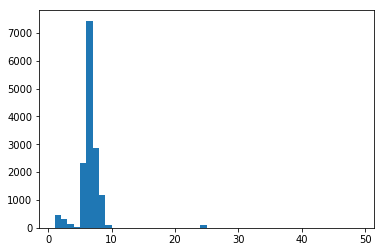

In [39]:
column_name = 'phosphate'
_ = plt.hist(vetcompass_df[column_name].dropna(), bins=np.arange(1,50,1))
plt.show()

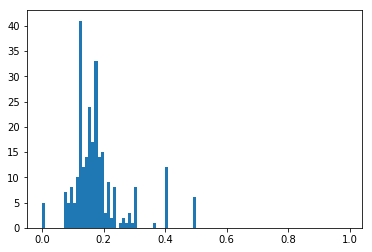

In [21]:
_ = plt.hist(frameyframe, bins=np.arange(0,1,.01))
plt.show()

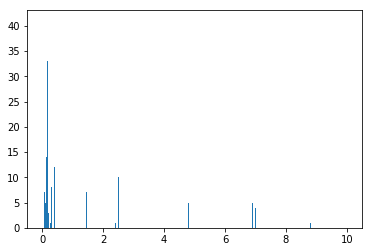

In [22]:
_ = plt.hist(frameyframe, bins=np.arange(0,10,.01))
plt.show()

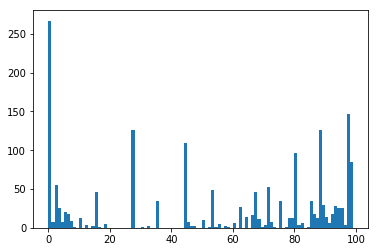

In [24]:
_ = plt.hist(frameyframe, bins=np.arange(0,100,1))
plt.show()

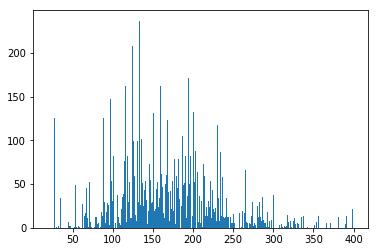

In [26]:
_ = plt.hist(frameyframe, bins=np.arange(20,400,1))
plt.show()

### Todo 

* Creatinine: multiply values below 1 by 1000. 
